In [1]:
# importing all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

nltk.download('punkt')
nltk.download("stopwords")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# load the data
df = pd.read_csv("news.csv")
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# droping the Unnamed: 0 column as it doesn't provide any value
df.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [5]:
# checking for balance in the label column
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

the data is balanced so there is no need to resample it

# Convert the label column to numerical column

In [6]:
df['label'] = df['label'].replace('REAL', '0')
df['label'] = df['label'].replace('FAKE', '1')
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [7]:
#  fixing the Dtype
df['label'] = df['label'].astype('int32') 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 123.9+ KB


# Now lets split the dataframe to work on each one at a time

In [9]:
df_title = df.drop(columns = 'text')
df_title.head(3)

,title,label
0,You Can Smell Hillary’s Fear,1
1,Watch The Exact Moment Paul Ryan Committed Pol...,1
2,Kerry to go to Paris in gesture of sympathy,0


In [10]:
df_text = df.drop(columns = 'title')
df_text.head(3)

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,U.S. Secretary of State John F. Kerry said Mon...,0


# preprocessing the data

In [11]:
def process_text(text):
    # Convert text to lower case
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing special characters
    tokens = [re.sub(r"[^a-zA-Z0-9]", "", token) for token in tokens]
    tokens = [token for token in tokens if token]  # Remove empty strings

    # Removing stop words and punctuation
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return tokens

In [12]:
df_text["text_tokenized"] = df_text['text'].apply(process_text)

In [13]:
df_text

,text,label,text_tokenized
0,"Daniel Greenfield, a Shillman Journalism Fello...",1,"[daniel, greenfield, shillman, journal, fellow..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,"[googl, pinterest, digg, linkedin, reddit, stu..."
2,U.S. Secretary of State John F. Kerry said Mon...,0,"[us, secretari, state, john, f, kerri, said, m..."
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,"[kayde, king, kaydeek, novemb, 9, 2016, lesson..."
4,It's primary day in New York and front-runners...,0,"[primari, day, new, york, frontrunn, hillari, ..."
...,...,...,...
6330,The State Department told the Republican Natio...,0,"[state, depart, told, republican, nation, comm..."
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,"[p, pb, stand, plutocrat, pentagon, post, oct,..."
6332,Anti-Trump Protesters Are Tools of the Oligar...,1,"[antitrump, protest, tool, oligarchi, reform, ..."
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",0,"[addi, ababa, ethiopia, presid, obama, conven,..."


In [14]:
df_title["title_tokenized"] = df_title['title'].apply(process_text)

In [15]:
df_title

,title,label,title_tokenized
0,You Can Smell Hillary’s Fear,1,"[smell, hillari, fear]"
1,Watch The Exact Moment Paul Ryan Committed Pol...,1,"[watch, exact, moment, paul, ryan, commit, pol..."
2,Kerry to go to Paris in gesture of sympathy,0,"[kerri, go, pari, gestur, sympathi]"
3,Bernie supporters on Twitter erupt in anger ag...,1,"[berni, support, twitter, erupt, anger, dnc, t..."
4,The Battle of New York: Why This Primary Matters,0,"[battl, new, york, primari, matter]"
...,...,...,...
6330,State Department says it can't find emails fro...,0,"[state, depart, say, ca, nt, find, email, clin..."
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,"[p, pb, stand, plutocrat, pentagon]"
6332,Anti-Trump Protesters Are Tools of the Oligarc...,1,"[antitrump, protest, tool, oligarchi, inform]"
6333,"In Ethiopia, Obama seeks progress on peace, se...",0,"[ethiopia, obama, seek, progress, peac, secur,..."


In [16]:
# remove the original title and text columns
df_title.drop(columns = 'title', inplace = True) 
df_text.drop(columns = 'text', inplace = True)

# feature engineering new columns for analysis

In [17]:
# the word count
df_title['word_count'] = df_title['title_tokenized'].apply(len)

# Unique word count
df_title['unique_word_count'] = df_title['title_tokenized'].apply(lambda x: len(set(x)))

In [18]:
# the word count
df_text['word_count'] = df_text['text_tokenized'].apply(len)

# Unique word count
df_text['unique_word_count'] = df_text['text_tokenized'].apply(lambda x: len(set(x)))

In [19]:
df_text

,label,text_tokenized,word_count,unique_word_count
0,1,"[daniel, greenfield, shillman, journal, fellow...",670,407
1,1,"[googl, pinterest, digg, linkedin, reddit, stu...",239,195
2,0,"[us, secretari, state, john, f, kerri, said, m...",243,167
3,1,"[kayde, king, kaydeek, novemb, 9, 2016, lesson...",261,181
4,0,"[primari, day, new, york, frontrunn, hillari, ...",180,115
...,...,...,...,...
6330,0,"[state, depart, told, republican, nation, comm...",387,181
6331,1,"[p, pb, stand, plutocrat, pentagon, post, oct,...",1316,805
6332,1,"[antitrump, protest, tool, oligarchi, reform, ...",1046,568
6333,0,"[addi, ababa, ethiopia, presid, obama, conven,...",659,403


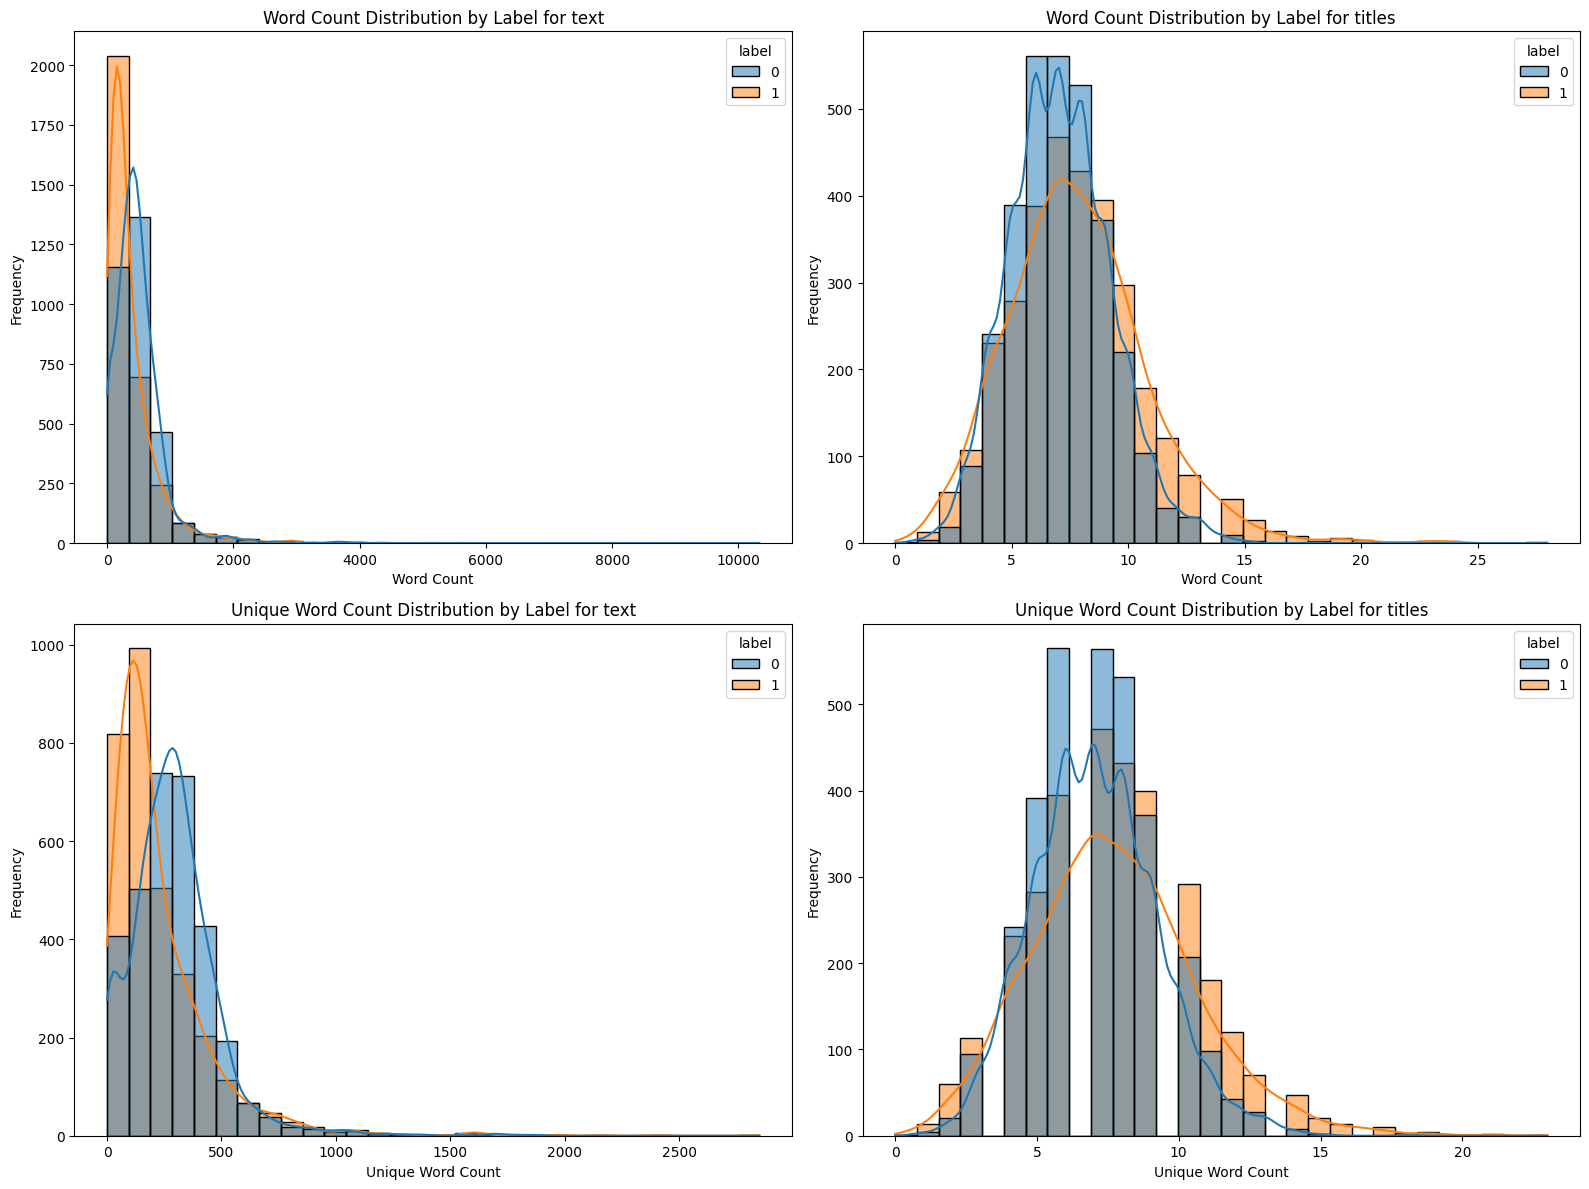

In [20]:
# making a 2*2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Word Count Distribution by Label for text
sns.histplot(data=df_text, x='word_count', hue='label', kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Word Count Distribution by Label for text')
axes[0, 0].set_xlabel('Word Count')
axes[0, 0].set_ylabel('Frequency')

# Word Count Distribution by Label for titles
sns.histplot(data=df_title, x='word_count', hue='label', kde=True, bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Word Count Distribution by Label for titles')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')

# Unique Word Count Distribution by Label for text
sns.histplot(data=df_text, x='unique_word_count', hue='label', kde=True, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Unique Word Count Distribution by Label for text')
axes[1, 0].set_xlabel('Unique Word Count')
axes[1, 0].set_ylabel('Frequency')

# Unique Word Count Distribution by Label for titles
sns.histplot(data=df_title, x='unique_word_count', hue='label', kde=True, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Unique Word Count Distribution by Label for titles')
axes[1, 1].set_xlabel('Unique Word Count')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

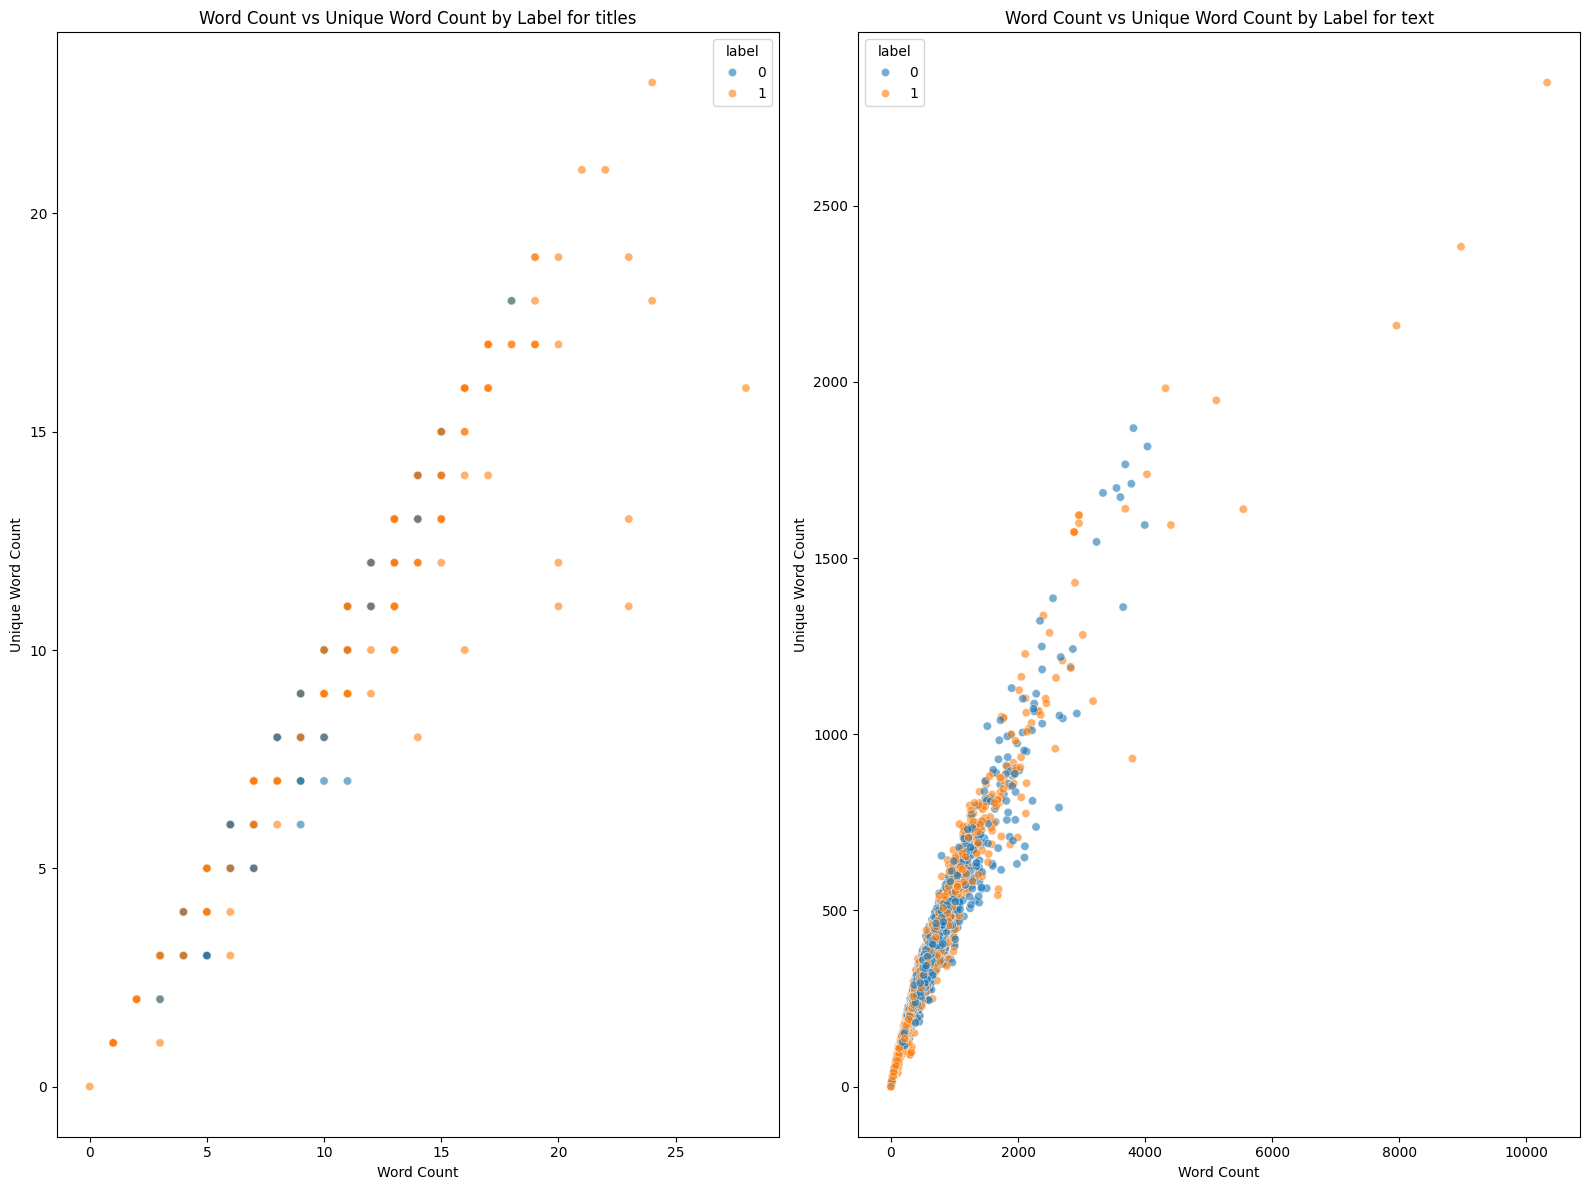

In [21]:
 fig, axes = plt.subplots(1, 2, figsize=(16, 12))

# Scatter plot of word count vs. unique word count for titles
sns.scatterplot(data=df_title, x='word_count', y='unique_word_count', hue='label', alpha=0.6,ax=axes[0])
axes[0].set_title('Word Count vs Unique Word Count by Label for titles')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Unique Word Count')

# Scatter plot of word count vs. unique word count for text
sns.scatterplot(data=df_text, x='word_count', y='unique_word_count', hue='label', alpha=0.6,ax=axes[1])
axes[1].set_title('Word Count vs Unique Word Count by Label for text')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Unique Word Count')

plt.tight_layout()

plt.show()


## It seems that fake news on average contains less unique words and words overall

# Convert the tokenized text into numerical features

In [22]:
df_title['text_joined'] = df_title['title_tokenized'].apply(lambda x: ' '.join(x))

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Transform the text column into a bag of words representation
X_title = vectorizer.fit_transform(df_title['text_joined'])

In [23]:
df_text['text_joined'] = df_text['text_tokenized'].apply(lambda x: ' '.join(x))

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Transform the text column into a bag of words representation
X_text = vectorizer.fit_transform(df_text['text_joined'])

In [24]:
y = df['label']

In [25]:
# Split the data into training and testing sets for the titles
X_title_train, X_title_test, y_title_train, y_title_test = train_test_split(X_title, y, test_size=0.2, random_state=42)


In [26]:
# Split the data into training and testing sets for the text
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y, test_size=0.2, random_state=42)


In [27]:
# making the model and training the data
model = LogisticRegression()
model.fit(X_title_train, y_title_train)



LogisticRegression()

In [28]:
# Make predictions
y_title_pred = model.predict(X_title_test)

# Check accuracy
accuracy = accuracy_score(y_title_test, y_title_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8129439621152328


In [29]:
# classification report
target_names = ['class 0/ True', 'class 1/Fake']
print(classification_report(y_title_test, y_title_pred, target_names=target_names))


               precision    recall  f1-score   support

class 0/ True       0.82      0.81      0.81       639
 class 1/Fake       0.81      0.82      0.81       628

     accuracy                           0.81      1267
    macro avg       0.81      0.81      0.81      1267
 weighted avg       0.81      0.81      0.81      1267



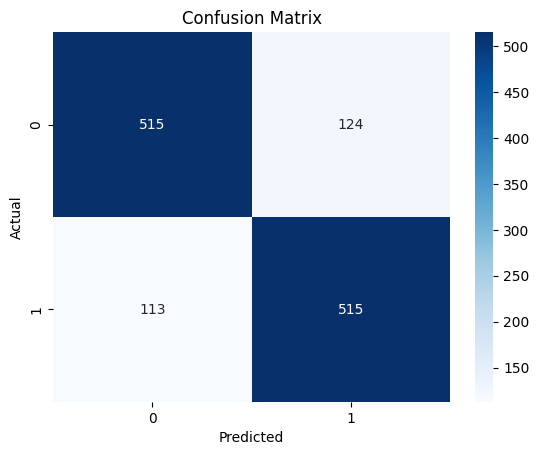

In [30]:
# making the confusion matrix
cm = confusion_matrix(y_title_test, y_title_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# making and training the model on the text data
model = LogisticRegression(max_iter=1000) # because the model failed to converage with the default number of iterations
model.fit(X_text_train, y_text_train)



LogisticRegression(max_iter=1000)

In [32]:
# Make predictions
y_text_pred = model.predict(X_text_test)

# Check accuracy
accuracy = accuracy_score(y_text_test, y_text_pred)
print(f'Accuracy: {accuracy*100}' + '%')

Accuracy: 92.42304656669297%


In [33]:
# classification report
target_names = ['class 0/ True', 'class 1/Fake']
print(classification_report(y_text_test, y_text_pred, target_names=target_names))


               precision    recall  f1-score   support

class 0/ True       0.93      0.92      0.92       639
 class 1/Fake       0.92      0.93      0.92       628

     accuracy                           0.92      1267
    macro avg       0.92      0.92      0.92      1267
 weighted avg       0.92      0.92      0.92      1267



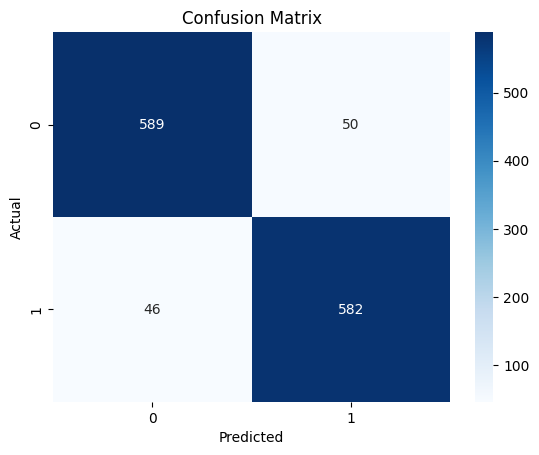

In [34]:
# making the confusion matrix
cm = confusion_matrix(y_text_test, y_text_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Lets try random forest classifier

In [35]:
# making and training a randomforestclassifier model on the text data
rfc = RandomForestClassifier()
rfc.fit(X_text_train, y_text_train)

RandomForestClassifier()

In [36]:
# making predictions
y_text_pred = rfc.predict(X_text_test)

# Check accuracy
accuracy = accuracy_score(y_text_test, y_text_pred)
print(f'Accuracy: {accuracy*100}' + '%')

Accuracy: 89.58168902920283%


In [37]:
# classification report
target_names = ['class 0/ True', 'class 1/Fake']
print(classification_report(y_text_test, y_text_pred, target_names=target_names))


               precision    recall  f1-score   support

class 0/ True       0.89      0.91      0.90       639
 class 1/Fake       0.91      0.88      0.89       628

     accuracy                           0.90      1267
    macro avg       0.90      0.90      0.90      1267
 weighted avg       0.90      0.90      0.90      1267



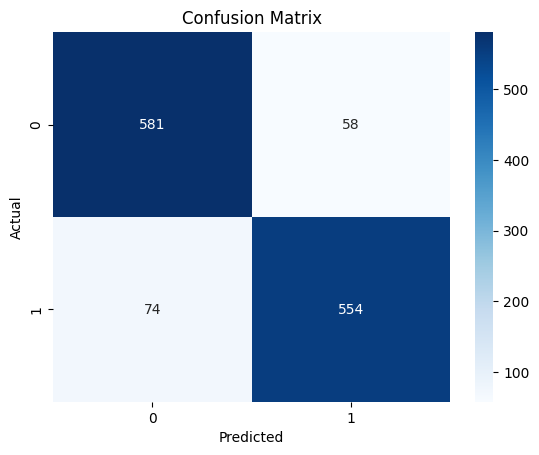

In [38]:
# making the confusion matrix
cm = confusion_matrix(y_text_test, y_text_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Conclusion 

In this notebook, we explored the problem of fake news detection using Logistic Regression and Random Forest classifiers. The dataset was balanced, so no resampling was needed. After preprocessing the text data (tokenization, stemming, and removal of stopwords), the features were extracted using methods like CountVectorizer to prepare them for the model.

Among the models tested, Logistic Regression performed effectively in predicting fake news, achieving a **93% recall**, **92% precision**, **92% F1-score**, and an overall **92% accuracy** in detecting fake news. The text of the articles showed better result than the titles to the model performance, highlighting the importance of text as a feature in this problem. Further tuning and feature engineering might enhance the model's performance even more.

Overall, the model does a reliable job of detecting fake news, and more complex approaches could be explored for further improvement.